In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing

/data/bergerar/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
df = pd.read_csv('../Data/df_440.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,ScanDir ID,Site,Gender,Age,Handedness,DX,...,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID,subID,has_brain
0,26,26,26,26,2371032.0,3,0.0,10.73,1.0,0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2371032,True
1,27,27,27,27,2026113.0,3,0.0,12.99,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2026113,True
2,28,28,28,28,3434578.0,3,0.0,8.12,1.0,0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-3434578,True
3,29,29,29,29,8628223.0,3,0.0,10.81,1.0,0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-8628223,True
4,30,30,30,30,1623716.0,3,0.0,12.65,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-1623716,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,707,707,707,707,16081.0,7,1.0,18.81,1.0,0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016081,True
436,709,709,709,709,16003.0,7,1.0,10.46,1.0,0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,sub-0016003,True
437,711,711,711,711,16057.0,7,0.0,16.74,1.0,0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016057,True
438,714,714,714,714,16023.0,7,0.0,12.51,0.0,0,...,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016023,True


## 

## TD and ADHD Subjects Scored by ADHD Rating Scale IV (ADHD-RS)

In [4]:
#vec_td1 and vec_adhd1 is adhd index for all ADHD measure = 1 = ADHD Rating Scale IV (ADHD-RS)

vec_td1 = df['ADHD Index'][(df['DX']==0).values * (df['ADHD Measure']==1).values].values
vec_td1[vec_td1<0] = np.nan

vec_adhd1 = df['ADHD Index'][(df['DX']!=0).values * (df['ADHD Measure']==1).values].values
vec_adhd1[vec_adhd1<0] = np.nan

Text(0.5, 1.0, 'TD and ADHD Subjects Scored by ADHD Rating Scale IV (ADHD-RS)')

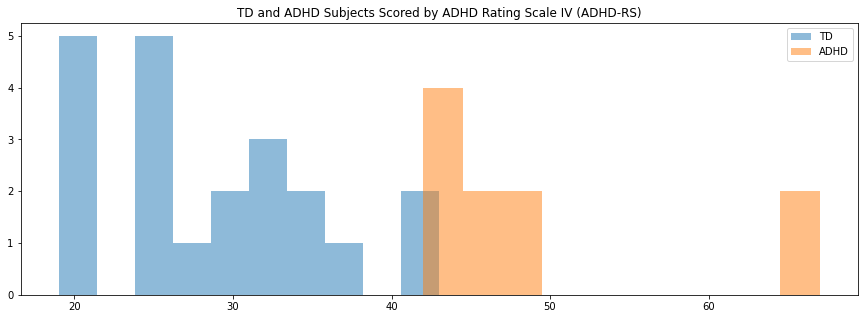

In [5]:
plt.figure(figsize=(15,5))
plt.hist(vec_td1,alpha=.5, label='TD')
plt.hist(vec_adhd1,alpha=.5, label='ADHD')
plt.legend()
plt.title('TD and ADHD Subjects Scored by ADHD Rating Scale IV (ADHD-RS)')

## 

## TD and ADHD Subjects Scored by Conners’ Parent Rating Scale-Revised, Long version (CPRS-LV)

Text(0.5, 1.0, 'TD and ADHD Subjects Scored by Conners’ Parent Rating Scale-Revised, Long version (CPRS-LV)')

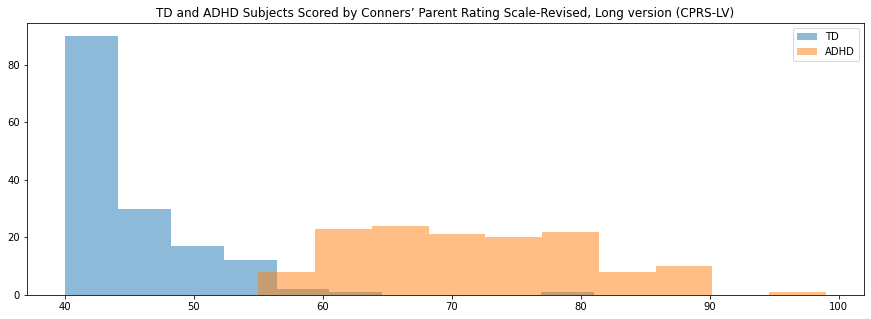

In [41]:
#vec_td2 and vec_adhd2 is adhd index for all ADHD measure = 2 = Conners’ Parent Rating Scale-Revised, Long version (CPRS-LV)
vec_td2 = df['ADHD Index'][(df['DX']==0).values * (df['ADHD Measure']==2).values].values
vec_td2[vec_td2<0] = np.nan

vec_adhd2 = df['ADHD Index'][(df['DX']!=0).values * (df['ADHD Measure']==2).values].values
vec_adhd2[vec_adhd2<0] = np.nan

plt.figure(figsize=(15,5))
plt.hist(vec_td2,alpha=.5, label='TD')
plt.hist(vec_adhd2,alpha=.5, label='ADHD')
plt.legend()
plt.title('TD and ADHD Subjects Scored by Conners’ Parent Rating Scale-Revised, Long version (CPRS-LV)')

## 

## Define Normalize Function

In [99]:
def norm_between_0_and_1(invec):
    'taskes in a vec, norms it, spits it back'
    '#zi = (xi – min(x)) / (max(x) – min(x))'
    'ignores the nans cus we fancy like that'
    # normed_vec = (invec - invec.min()) / ((invec.max() - invec.min()))
    normed_vec = (invec - np.nanmin(invec) ) / ((np.nanmax(invec) - np.nanmin(invec)))
    return normed_vec

#### Normalize ADHD Index Data

In [76]:
adhd_scores_all = df['ADHD Index'].values
adhd_scores_normed = adhd_scores_all.copy() # idk, going off of vibes - making a copy cause python is stupid (soft copy hard copy bs)
adhd_scores_all[adhd_scores_all < 0] = np.nan # All -999 become nans

In [98]:
measure_1 = df['ADHD Measure'].values==1
adhd_scores_normed[measure_1] = norm_between_0_and_1(adhd_scores_all[measure_1])
# take all scores, and norm just the slice of it

In [82]:
measure_2 = df['ADHD Measure'].values==2
adhd_scores_normed[measure_2] = norm_between_0_and_1(adhd_scores_all[measure_2])
# take all scores, and norm just the slice of it
df['ADHD Measure Normed'] = adhd_scores_normed

In [105]:
# rename column heading for clarity (measure refers to scoring scale, index refers to score in original df)
df.rename(columns = {'ADHD Measure Normed' : 'ADHD Index Normed'}, inplace = True)

#### Check df

In [106]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,ScanDir ID,Site,Gender,Age,Handedness,DX,...,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID,subID,has_brain,ADHD Index Normed,Inattentive Normed
0,26,26,26,26,2371032.0,3,0.0,10.73,1.0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-2371032,True,0.118644,0.30
1,27,27,27,27,2026113.0,3,0.0,12.99,1.0,1,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-2026113,True,0.847458,0.98
2,28,28,28,28,3434578.0,3,0.0,8.12,1.0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-3434578,True,0.033898,0.04
3,29,29,29,29,8628223.0,3,0.0,10.81,1.0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-8628223,True,0.033898,0.18
4,30,30,30,30,1623716.0,3,0.0,12.65,1.0,1,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-1623716,True,0.796610,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,707,707,707,707,16081.0,7,1.0,18.81,1.0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016081,True,NaN,NaN
436,709,709,709,709,16003.0,7,1.0,10.46,1.0,0,...,NaN,NaN,NaN,0.0,NaN,NaN,sub-0016003,True,NaN,NaN
437,711,711,711,711,16057.0,7,0.0,16.74,1.0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016057,True,NaN,NaN
438,714,714,714,714,16023.0,7,0.0,12.51,0.0,0,...,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016023,True,NaN,NaN


#### Note on Soft Copy

In [97]:
# Note on soft copy
# Soft copy is the devil 
# be careful 

a = [1,0,0,0]
b = a
b[0]=0
a # Changed a without changing a 

[0, 0, 0, 0]

#### Normalize Inattentive Index

In [101]:
adhd_inattentive_all = df['Inattentive'].values
adhd_inattentive_normed = adhd_inattentive_all.copy() # idk, going off of vibes - making a copy cause python is stupid (soft copy hard copy bs)
adhd_inattentive_all[adhd_inattentive_all < 0] = np.nan # All -999 become nans

In [102]:
measure_1 = df['ADHD Measure'].values==1
adhd_inattentive_normed[measure_1] = norm_between_0_and_1(adhd_inattentive_all[measure_1])
# take all scores, and norm just the slice of it

In [103]:
measure_2 = df['ADHD Measure'].values==2
adhd_inattentive_normed[measure_2] = norm_between_0_and_1(adhd_inattentive_all[measure_2])
# take all scores, and norm just the slice of it
df['Inattentive Normed'] = adhd_inattentive_normed

#### Normalize Hyperactive/Impulsive Index

In [107]:
adhd_HI_all = df['Hyper/Impulsive'].values
adhd_HI_normed = adhd_HI_all.copy() # idk, going off of vibes - making a copy cause python is stupid (soft copy hard copy bs)
adhd_HI_all[adhd_HI_all < 0] = np.nan # All -999 become nans

In [108]:
measure_1 = df['ADHD Measure'].values==1
adhd_HI_normed[measure_1] = norm_between_0_and_1(adhd_HI_all[measure_1])
# take all scores, and norm just the slice of it

In [109]:
measure_2 = df['ADHD Measure'].values==2
adhd_HI_normed[measure_2] = norm_between_0_and_1(adhd_HI_all[measure_2])
# take all scores, and norm just the slice of it
df['Hyper/Impulsive Normed'] = adhd_HI_normed

#### Save new df as csv

In [111]:
df.to_csv('../Data/df_440_normed.csv')